In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

Coefficient would be:  [28.12597332]
Intercept would be:  -2.271014426178382


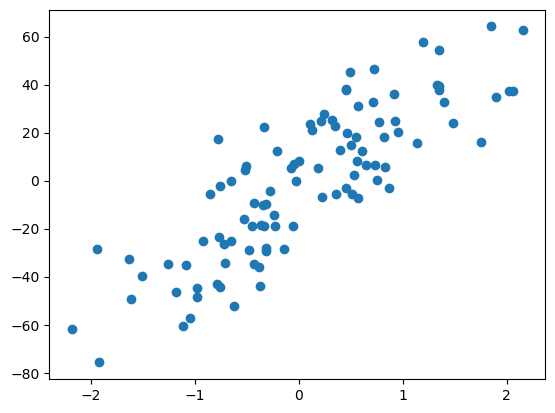

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

print("Coefficient would be: ",lr.coef_)
print("Intercept would be: ",lr.intercept_)

plt.scatter(X, y)
plt.show()

<ipython-input-4-e5b43e6301ba>:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  L.fit(X_train, y_train)
/home/saad/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/saad/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12053.094737432484, tolerance: 8.397090083251122
  model = cd_fast.enet_coordinate_descent(


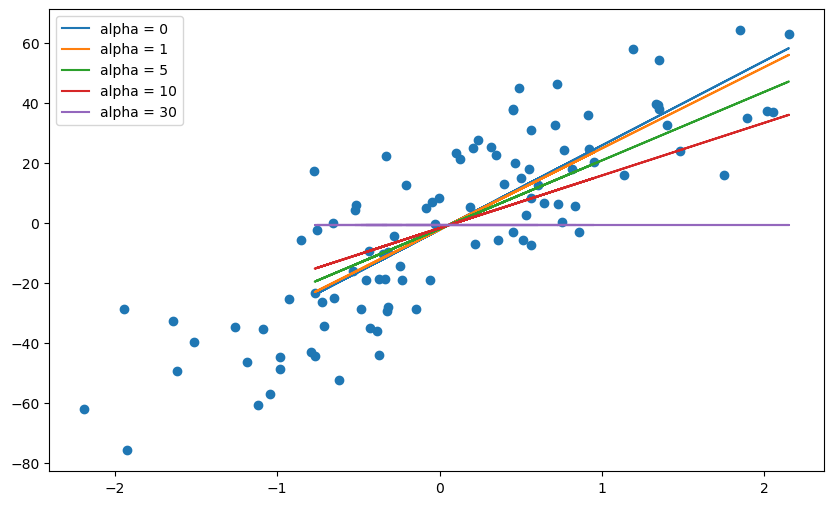

In [4]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(10,6))
plt.scatter(X, y)

for i in alphas:
    L = Lasso(alpha=i) # creating object of lasso regression for different alpha values
    L.fit(X_train, y_train)
    plt.plot(X_test, L.predict(X_test), label='alpha = {}'.format(i))
plt.legend()
plt.show()

The value of purpple line is zero so in this case my model is underfitting. Rather in the case of Ridge the value had not exact equal to zero it was just near to zero.

In [5]:
# now i see on the polynomial regression

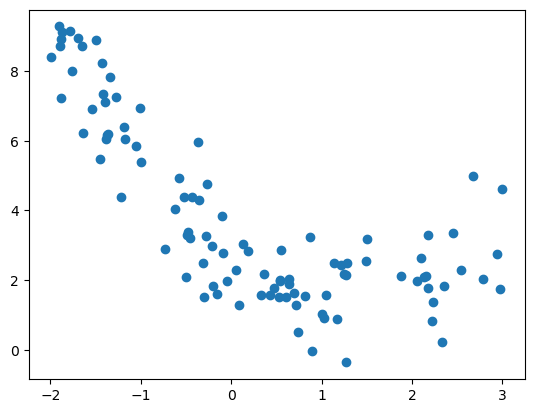

In [6]:
# generating a non-linear dataset
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1) # ax^2 +bx + c

plt.scatter(x1,x2)
plt.show()

/home/saad/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/saad/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/saad/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45.60327722358516, tolerance: 0.06462526132710084
  model = cd_fast.enet_coordinate_descent(
/home/saad/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

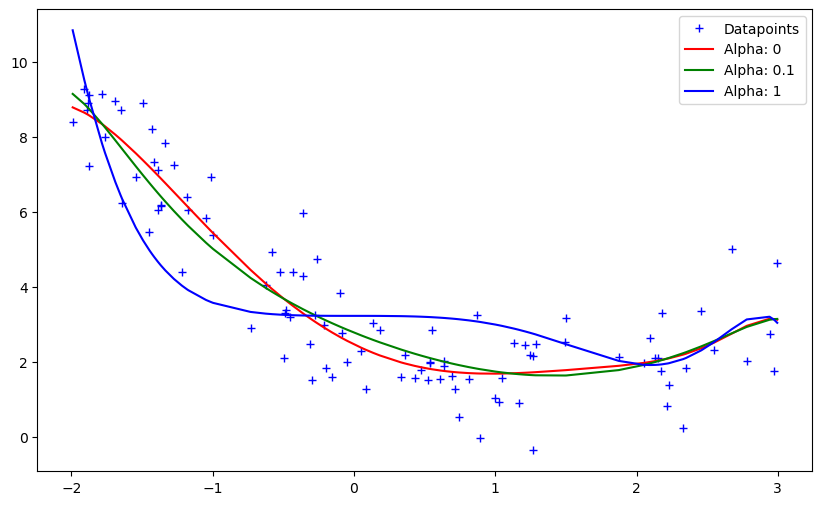

In [7]:
from sklearn.pipeline import Pipeline # For creating a Pipeline
from sklearn.preprocessing import PolynomialFeatures # For polynomial regression
from sklearn.linear_model import Ridge # For Ridge Regression

def get_lasso_pred(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)), # object of Polynomial Regressor and giving degree value
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10,6))
plt.plot(x1, x2, 'b+', label='Datapoints')


for alpha, c in zip(alphas, cs):
    preds = get_lasso_pred(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))
    
plt.legend()
plt.show()

When would i working on high dimensional data then there i use Lasso Regreesion because it convert the less needed coefficient values to zero so my dimension become decrease and while doing this i also do feature selection So i prefer the Lasso for high Dimension data than Ridge.